In [2]:
import numpy as np
from matplotlib import pyplot as plt
import mca

from scipy.constants import *

In [3]:
path = ('datafiles', 'spectrum')
table = np.zeros((mca.trials(*path), 3))

def callaback(data, i):
    table[i, 0] = data['pressure']
    table[i, 1] = data['FWHM']
    table[i, 2] = data['R']

mca.map_folder(*path, callaback)

In [4]:
table = table[table[:,0].argsort()]
# print(table)
# plt.plot(table[:,0], table[:,2], '.')
# plt.ylabel(r'FWHM $FWHM$ MeV')
# plt.xlabel(r'Pressure $P$ MeV/cm${}^2$')

C:\Users\wabod\AppData\Local\Temp/ipykernel_24624/2012915306.py:24: RuntimeWarning: divide by zero encountered in log
  B = Z_t*np.log(4 * m_e*E / (m_p * I * micro)) - 0.9


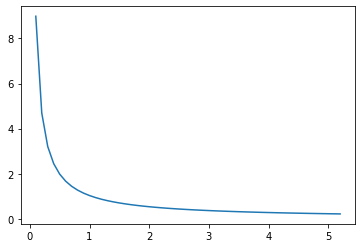

In [16]:
P_sat = lambda T: 610.78*10**((7.5*T-2048.625)/(T-35.85))

def rho(P_torr, T, Φ):
    '''
    @param T: temperature in °C
    @param P_torr: pressure in torr
    @param Φ: humidity in %
    @returns a function of linear distance in centimeters which represents the areal density in mg/cm^2.
    '''
    T = T + 273.15
    P = P_torr * 133.3224
    P_v = P_sat(T)*Φ
    P_d = P - P_v
    R_d = 287.058
    R_v = 461.495
    return (1/T)*(P_d/R_d + P_v/R_v)

def Bethe_Bloch(E):
    I = 32.5*micro
    Z_p = 2
    Z_t = 7.2
    N = 2 / 14.4 * Avogadro
    r_e = 2.8179*10**(-15)
    B = Z_t*np.log(4 * m_e*E / (m_p * I * micro)) - 0.9
    # print(B)
    return 2*np.pi*r_e**2 * (0.511)**2 * Z_p**2 * N * m_p/m_e * B / E

x = np.arange(0, 5.3, 0.1)
plt.plot(x, Bethe_Bloch(x), '-')
plt.show()


140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229257024
140.85615229

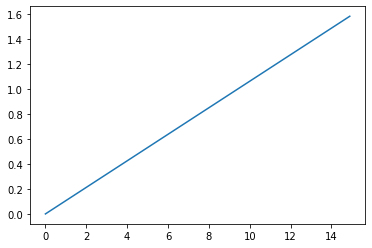

In [11]:
rhos = np.arange(0, 15, 0.1)

plt.plot(rhos, [Bethe_Bloch(5.3, r) for r in rhos])
plt.show()

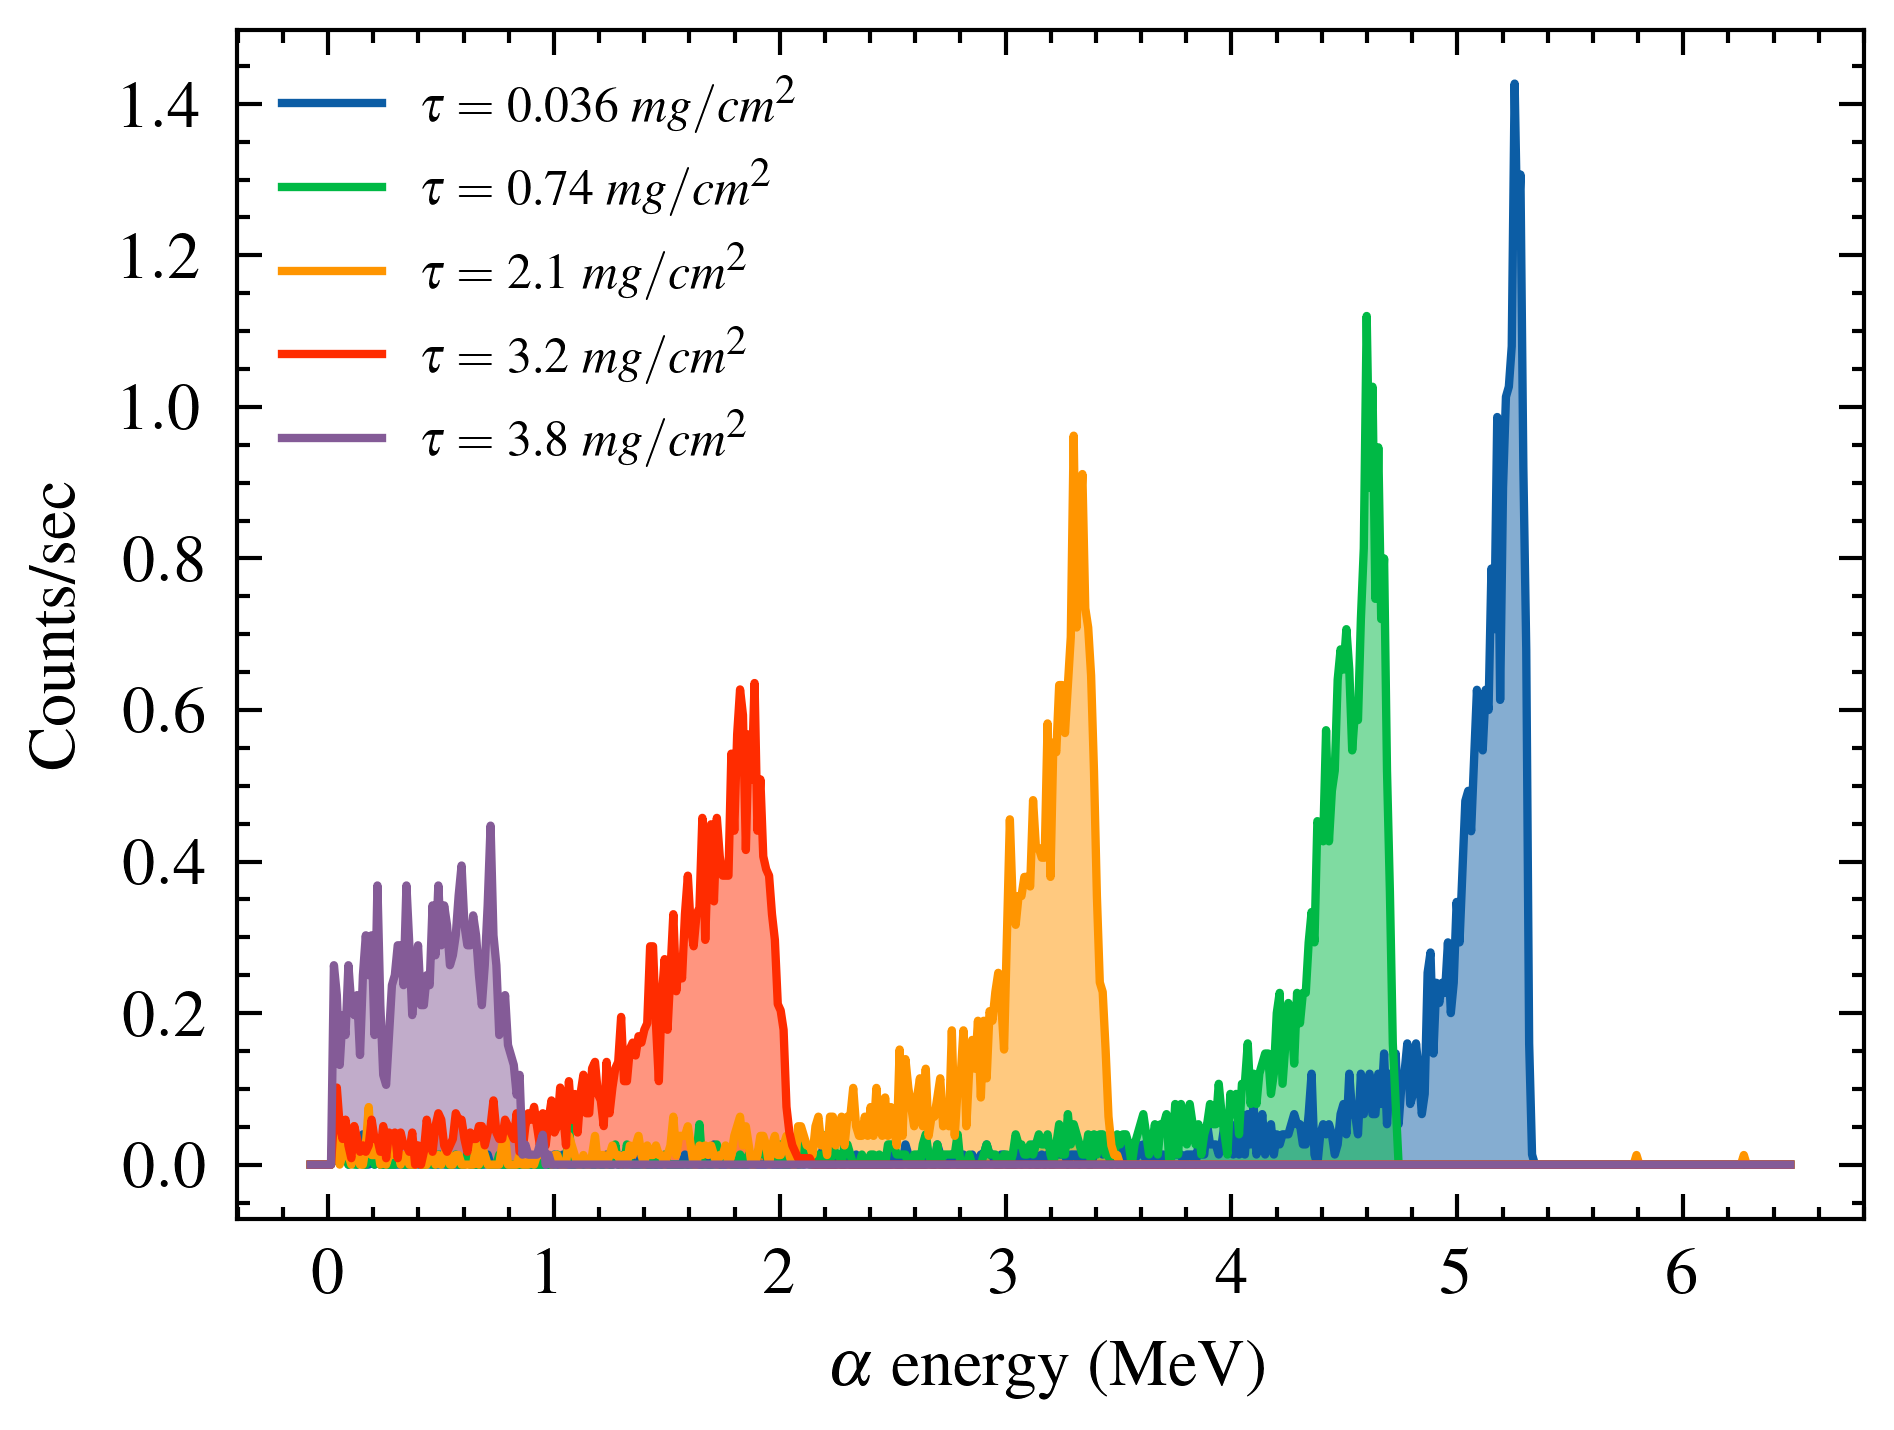

In [37]:
import cal
from arealDensity import *
filenames = ['datafiles/spectrum7.Spe',
            'datafiles/spectrum118.Spe',
            'datafiles/spectrum327.Spe',
            'datafiles/spectrum504.Spe',
            'datafiles/spectrum606.Spe']
for file in filenames:
    data = mca.extract_data(file)

    # print('\n   From file :', filename, '\n')
    # print('        Date :', data['date'])
    # print('           T :', data['temperature'], '(C)')
    # print('           R :', data['R'], '(counts/sec)')
    # print('    Pressure :', data['pressure'], '(torr)')
    # print('Peak channel :', data['peak_channel']) 
    # print('       σ_E_p :', data['σ_E_p'], ('MeV'))
    # print(' Peak Energy :', data['E_p'], '(Mev)')    # print('        FWHM :', data['FWHM'], '(Mev)')
    
    ch = np.arange(len(data['data']))
    plt.plot(cal.E(ch), data['data']/data['meas_live'], '-', label=rf'$\tau = $ {τ(data["pressure"], data["temperature"], 0.2)(4) :.2} $mg/cm^2$')
    plt.fill_between(cal.E(ch), data['data']/data['meas_live'], alpha=0.5)

plt.style.use('ieee')
plt.xlabel(r'$\alpha$ energy (MeV)')
plt.ylabel(r'Counts/sec')
plt.legend(prop={'size': 6})
plt.show()

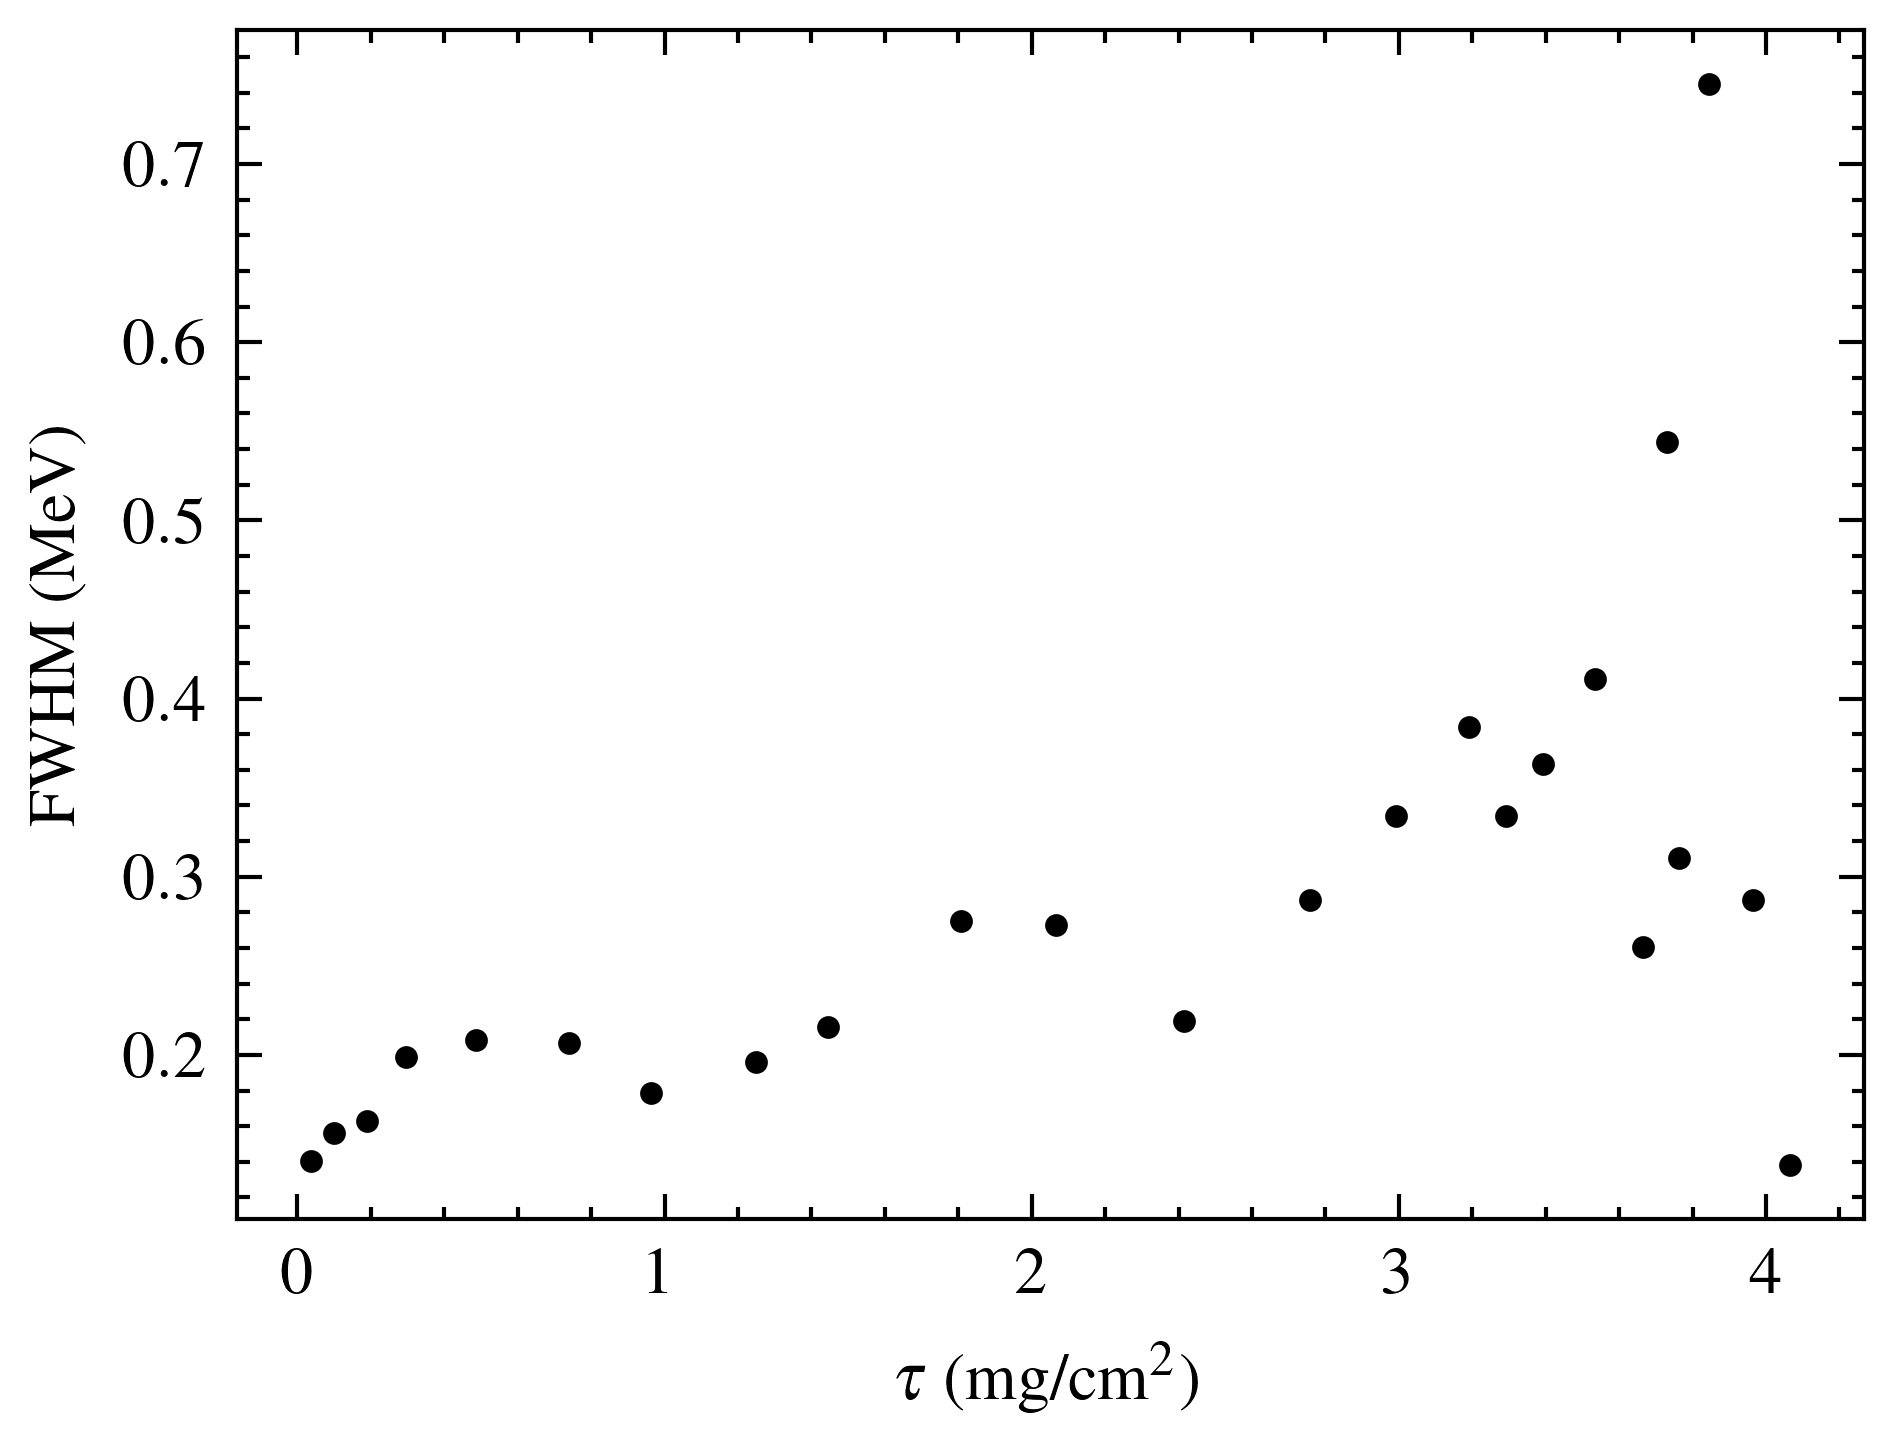

In [48]:
path = ('datafiles', 'spectrum')

plt.style.use('science')
points = []
mca.map_folder(*path, lambda data, i: plt.scatter(
    τ(data['pressure'], data['temperature'], 0.2)(4),
     data['FWHM'],
     color = 'black',
     s = 3
     )
    )
plt.xlabel(r'$\tau$ (mg/cm$^2$)')
plt.ylabel(r'FWHM (MeV)')
plt.show()

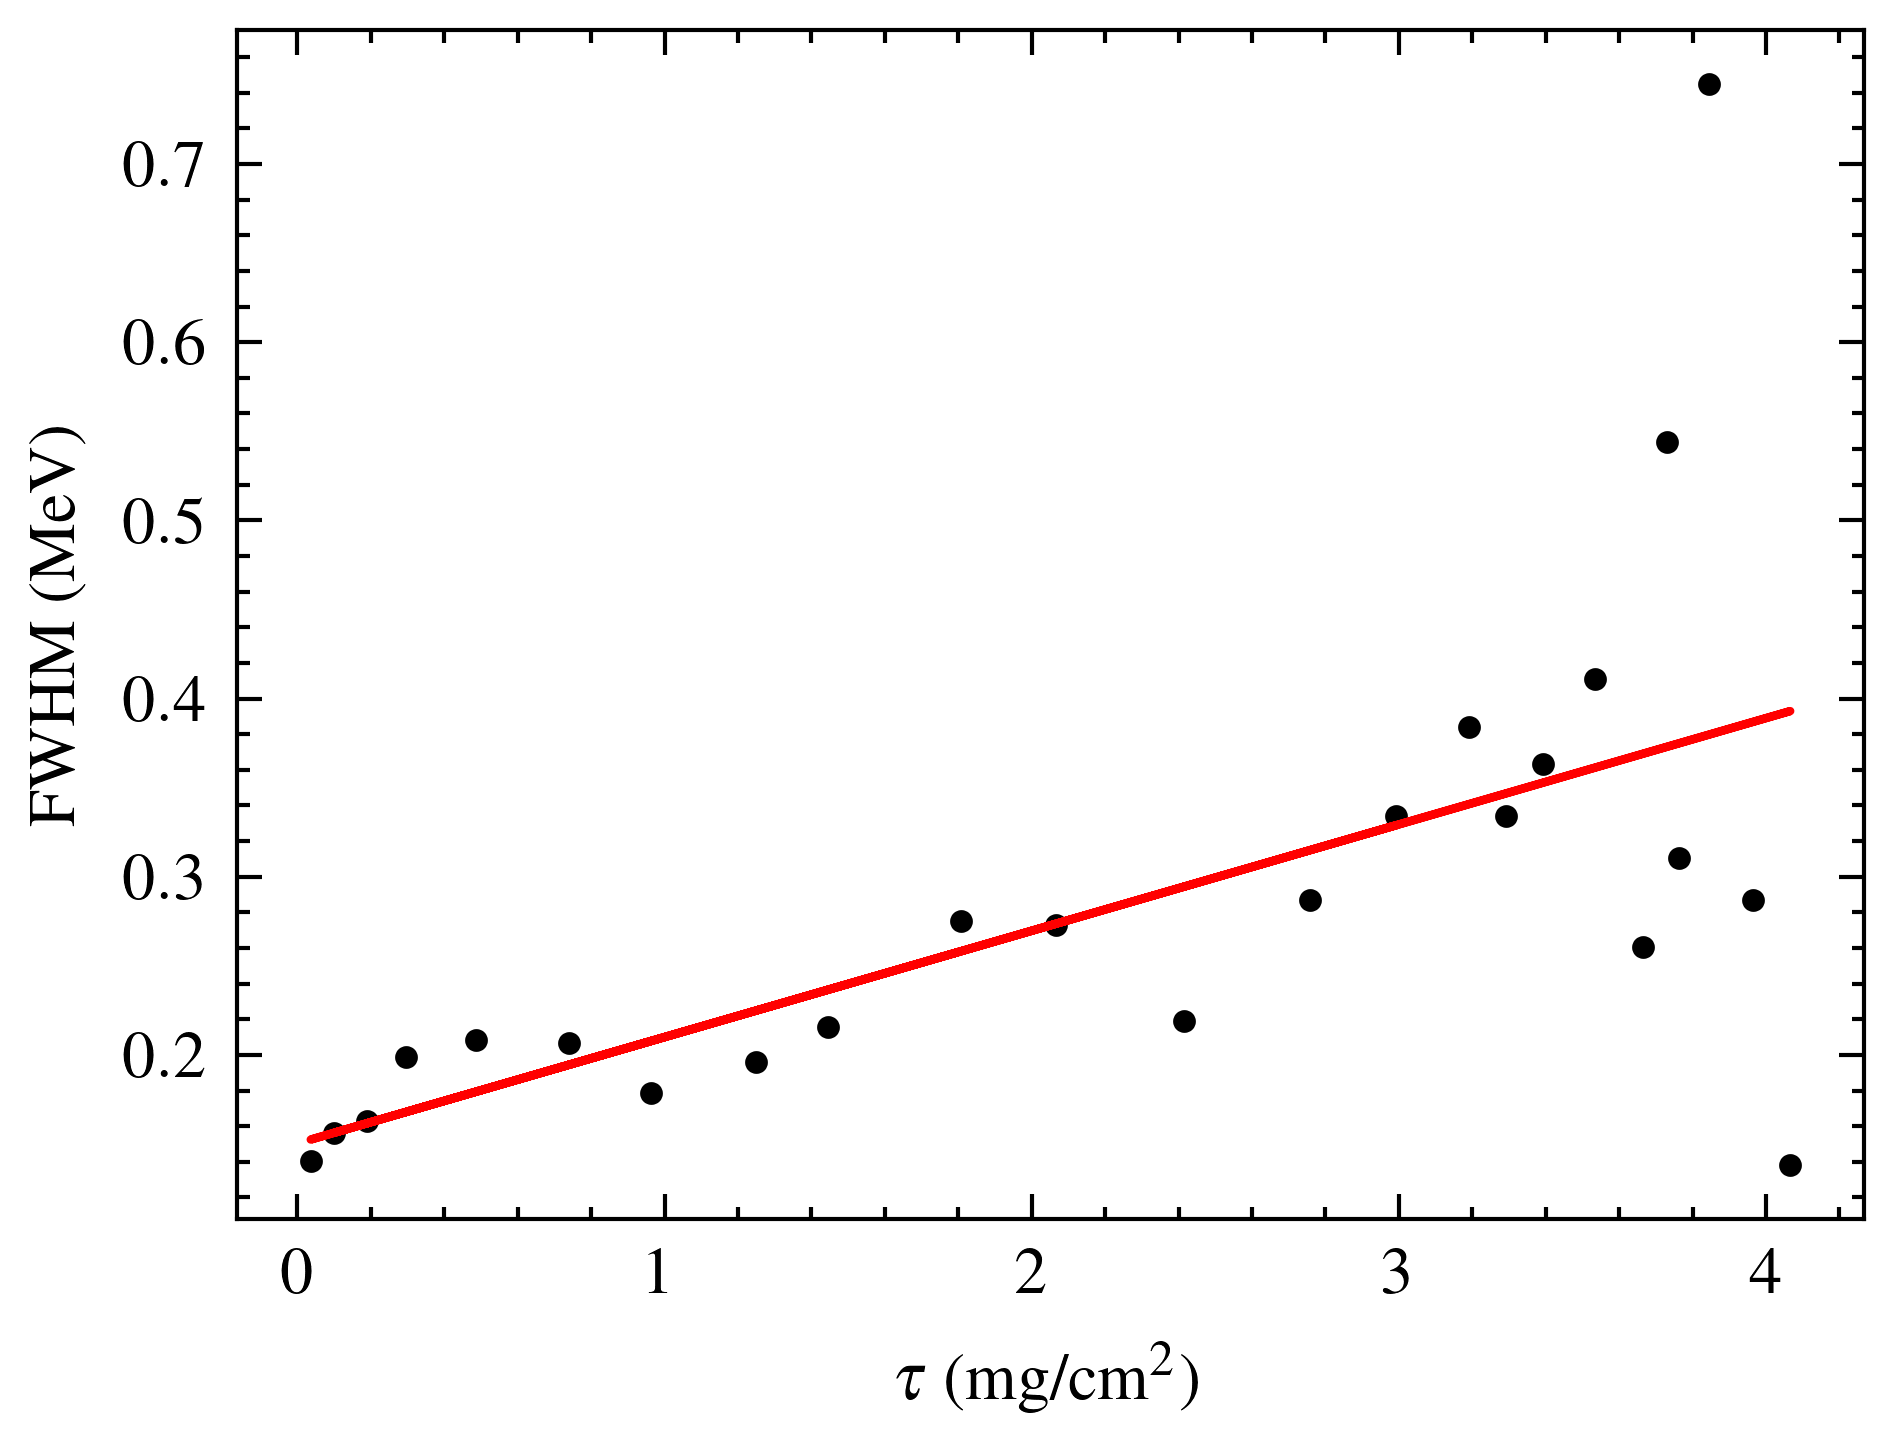

0.05967764959731749


In [53]:
from scipy.optimize import curve_fit

path = ('datafiles', 'spectrum')

plt.style.use('science')
points = []
mca.map_folder(*path, lambda data, i: points.append([
        τ(data['pressure'], data['temperature'], 0.2)(4),
        data['FWHM']
    ]))

points = np.array(points)
plt.scatter(points[:,0], points[:,1], s=3, color='black')

def linear(x, a, b): return a*x + b

pars, cov = curve_fit(linear, points[:,0], points[:,1])

plt.plot(points[:,0], linear(points[:,0], *pars), '-', color='red')

plt.xlabel(r'$\tau$ (mg/cm$^2$)')
plt.ylabel(r'FWHM (MeV)')
plt.show()

print(pars[0])

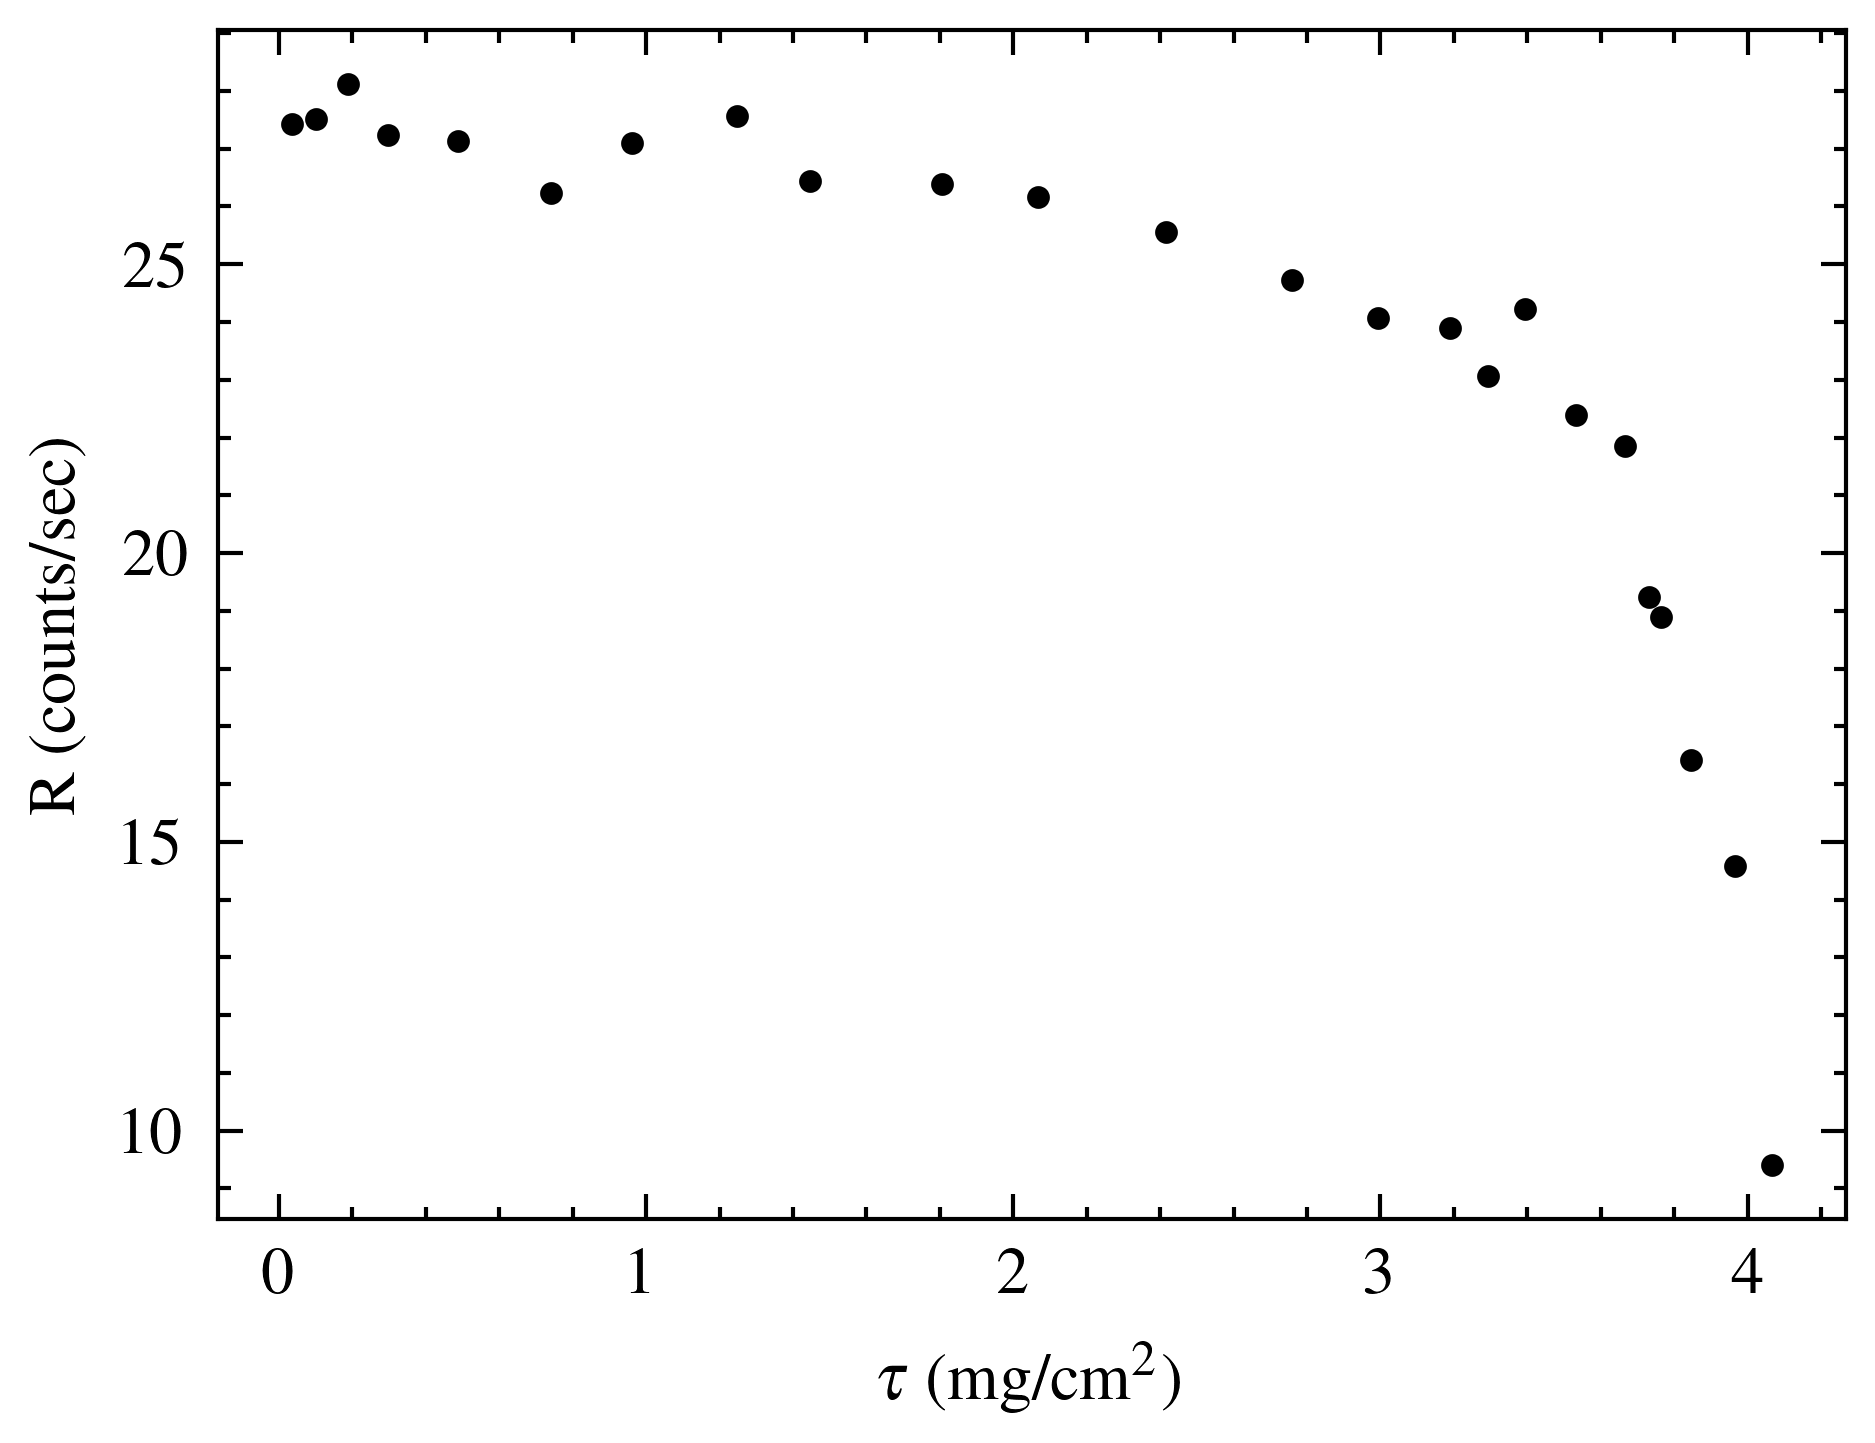

In [52]:
plt.style.use('science')
mca.map_folder(*path, lambda data, i: plt.scatter(
    τ(data['pressure'], data['temperature'], 0.2)(4),
    data['R'],
    s = 3,
    color = 'black'
))
plt.xlabel(r'$\tau$ (mg/cm$^2$)')
plt.ylabel(r'R (counts/sec)')
plt.show()